# Linear Regression

## Outline

1. Supervised vs Unsupervised Learning
2. Linear Regression:
    - Concept
    - Scikit Learn
    - Pros and Cons

## Machine Learning

1. Supervised Learning
    - dengan label
    - analogi: seorang bayi belajar macam-macam buah dengan dituntun oleh orang tuanya 


2. Unsupervised Learning
    - tanpa label
    - analogi: mengelompokkan macam-macam buah berdasarkan karakteristik yang mirip


3. Reinforcement Learning
    - sistem belajar tanpa data, namun melalui lingkungan

## Linear Regression Concept

- Dependent variable is continuous
- Regression line is linear
- The best fit line accomplished by Least Square Method
- Evaluate model performance using R-squared
- Types:
    - Simple linear regression: one feature $y = a + bx$
    - Multiple linear regression: multiple feature $y = w_0x_0 + w_1x_1 + ... + w_mx_m$

## Scikit learn

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Highlight:
- Parameters
    - `fit_intercept = True`
    - `normalize = False`
    
- Methods
    - `.fit(X, y[, sample_weight])`
    - `.predict(X)`
    - `.score(X, y[, sample_weight])`

## Pros and Cons

Pros:
1. Easy to understand
2. Easy to implement and achieve good score
3. Ability to identify outliers or anomalies

Cons:
1. Limited to linear relationships
2. Sensitive to outliers

# Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Salary Dataset

## Load Data

In [2]:
salary = pd.read_csv("datasets/salary-data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Inspect Data

In [3]:
salary.shape

(30, 2)

Cek missing value:

In [4]:
salary.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

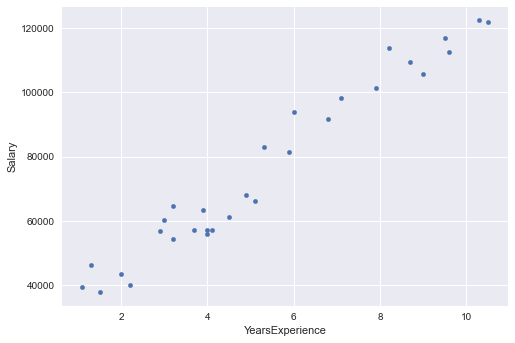

In [5]:
salary.plot.scatter(x='YearsExperience',
                    y='Salary')
plt.show()

## Data Preparation

Train-test splitting

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_data, test_data = train_test_split(salary, test_size=0.2, random_state=333)
print(train_data.shape)
print(test_data.shape)

(24, 2)
(6, 2)


Feature and label splitting

In [8]:
train_feature = train_data.drop(['Salary'], axis=1)
train_label = train_data['Salary']

test_feature = test_data.drop(['Salary'], axis=1)
test_label = test_data['Salary']

## Train Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()
lr_model.fit(X=train_feature,
             y=train_label)

LinearRegression()

## Test Model

In [11]:
# R-squared
lr_model.score(X=test_feature, y=test_label)

0.9421901163257497

In [12]:
final_result = test_data.copy()
final_result['PredictedSalary'] = lr_model.predict(X=test_feature)
final_result

,YearsExperience,Salary,PredictedSalary
21,7.1,98273.0,92312.284566
0,1.1,39343.0,35796.740414
6,3.0,60150.0,53693.329396
2,1.5,37731.0,39564.443357
4,2.2,39891.0,46157.923509
17,5.3,83088.0,75357.621321


## Visualize Result

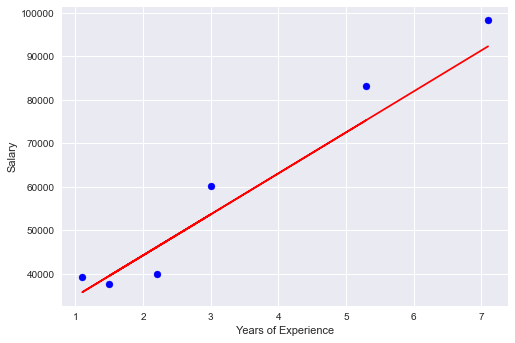

In [13]:
plt.scatter(final_result['YearsExperience'], final_result['Salary'], color='blue')
plt.plot(final_result['YearsExperience'], final_result['PredictedSalary'], color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [14]:
print(f"Coefficient: {lr_model.coef_[0]}")
print(f"Intercept: {lr_model.intercept_}")

Coefficient: 9419.257358745912
Intercept: 25435.557319273714


Regression Line:
$Salary = 25435.557 + 9419.257 * YearsExperience$